# Imports

In [37]:
import pandas as pd 
import ast
from ast import literal_eval
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

import multiprocessing
from multiprocessing import Pool
import CleaningFunctions
from functools import partial
from IPython.display import display, clear_output
import math

import winsound
from numpy import *


import statistics

from datetime import datetime
from dateutil.parser import parse
import time
import datetime

import csv

from sklearn.metrics import mean_squared_error

# Reading and Cleaning data - changing everything into neumeric value

In [38]:
# Initializing certain lists to be edited

dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']
dataID = { 'belongs_to_collection' : 'id',  'genres': 'id', 'production_companies': 'id', 'production_countries': 'iso_3166_1',  'spoken_languages': 'iso_639_1', 'Keywords': 'id', 'cast': 'id', 'crew': 'id'}
dataNeeded = ['id', 'belongs_to_collection', 'budget', 'genres', 'original_language',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'Keywords',
       'cast', 'crew', 'revenue']

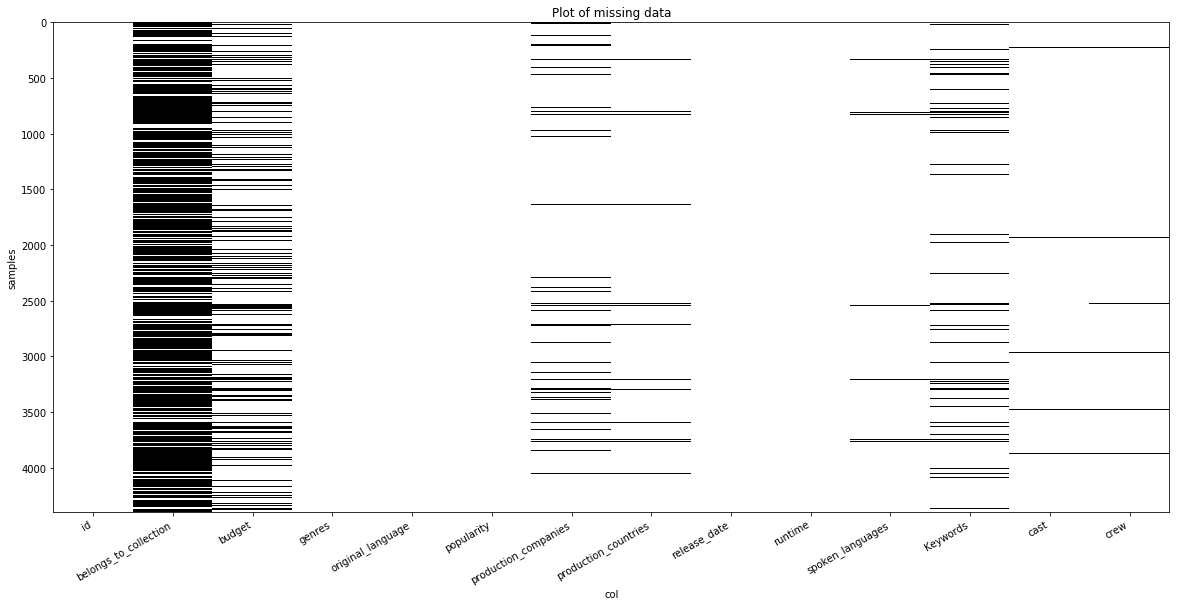

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast,crew
0,3001,[34055],NaN,"[12, 16, 10751, 14]",0,3.851534,[],"[7, 0]",7/14/07,90.0,"[0, 6]","[11451, 11551]","[82140, 111768, 111767, 73044, 108721, 111779,...","[65429, 25761]"
1,3002,[],88000.0,"[27, 878]",1,3.559789,[9233],[0],5/19/58,65.0,[0],"[9748, 9951, 11034, 11513, 14819, 15184, 18909...","[104412, 108299, 89163, 34211, 140411, 14365, ...","[13781, 40392, 40392, 44878, 91999, 98447, 101..."
2,3003,[],NaN,"[35, 10749]",1,8.085194,"[6194, 19507, 53009]",[0],5/23/97,100.0,[0],"[931, 9673, 9748, 14602]","[5344, 4756, 11164, 10698, 21151, 21152, 21153...","[2171, 21146, 20908, 3562, 8846, 21147, 21148,..."
3,3004,[],6800000.0,"[18, 10752, 9648]",2,8.596012,"[313, 7272, 7273]","[4, 2]",9/4/10,130.0,"[1, 9, 0]","[378, 539, 570, 789, 1550, 2297, 5153, 5950, 6...","[77498, 84573, 88592, 38526, 196737, 970213, 2...","[4657, 6997, 5426, 7290, 8355, 21471, 57069, 5..."
4,3005,[],2000000.0,"[36, 99]",1,3.217680,[],[0],2/11/05,92.0,[0],"[279, 1228, 5436, 12420]","[2778, 71766, 6449, 13716]","[339, 5284, 6159, 16957, 16957, 16957, 16958, ..."


In [50]:
#setting the file we want to read
file = "test.csv"
# quotechar='"',na_values = [0] , quoting=3, 
#reading from CSV
df = pd.read_csv(file, header= 0, quotechar='"', sep=',', encoding = "ISO-8859-1",keep_default_na=True, 
                dtype = { 'belongs_to_collection' : 'category',  'genres' : 'category', 'original_language' : 'category', 'production_companies' : 'category', 'production_countries' : 'category',  'spoken_languages' : 'category', 'Keywords' : 'category', 'cast' : 'category', 'crew' : 'category'},
                
                )

df = df.replace(0, np.nan)

#dropping the columns that was not needed
for col in df.keys():
    if not (col in dataNeeded) :
        df = df.drop(columns = col)
        
#http://www.maths.bath.ac.uk/~jjf23/LMR/python/missing.html

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(~df.isna(), aspect='auto')
label = df.keys().tolist()
plt.imshow(~df.isna(), aspect='auto')
plt.xlabel("col")
plt.ylabel("samples")
ax.set_xticks(np.arange(len(label)))
ax.set_xticklabels(label)
fig.autofmt_xdate()
plt.title("Plot of missing data")
plt.gray()
plt.show()

#filling empty list with []
for col in dataList :
    try:
        df[col] = df[col].cat.add_categories('[]',inplace = False)
    except:
        pass
    df[col].fillna( '[]' , inplace = True) 

#changing a sting of list into list
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval)     

#changing the dict in the list into ID only
for col in dataList : 
    for row in range(len(df)) :
        for num in range(len(df[col][row])) :
            if not (isinstance(df[col][row][num], int) or isinstance(df[col][row][num], str)):
                df[col][row][num] = df[col][row][num][dataID[col]]    

# getting all unique values
uniqueSpokenLanguage = df['spoken_languages'].apply(pd.Series).stack().value_counts().keys().values.tolist()
for row in range(len(df)) :
    for num in range(len(df['spoken_languages'][row])):
        df['spoken_languages'][row][num] = uniqueSpokenLanguage.index(df.spoken_languages[row][num])

uniqueOrgLanguage = df['original_language'].unique().tolist()
df.original_language = df.original_language.replace(uniqueOrgLanguage,range(len(uniqueOrgLanguage)))

uniqueCountries = df['production_countries'].apply(pd.Series).stack().value_counts().keys().values.tolist()

for row in range(len(df)) :
    for num in range(len(df['production_countries'][row])):
        df['production_countries'][row][num] = uniqueCountries.index(df.production_countries[row][num])

df.head()

In [51]:
#changing the time into numerical value

currentDT = datetime.datetime.now()
print (str(currentDT))

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = range(len(df))
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.time2num, df)
    result = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)

df["release_date"] = result

2019-05-08 20:19:25.004752
458.8127841949463


In [104]:
# save to save.csv as a checkpoint 
#df.to_csv('save_ORG.csv',index_label = False)

df = pd.read_csv('save_ORG.csv')
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval) 

# Getting only low variance value for vectors that is too large to compute

In [105]:
import os
import statistics

# if the file already exist, then do not need to check out the performance again 
if(os.path.isfile('Performance.csv')):
    PerformanceDF = pd.read_csv('Performance.csv')
else:
    PerformanceDF = pd.DataFrame(columns=['col','id', 'mean', 'var'])
    for col in dataList:
        print(col)
        
        #collect all revenue for each crew
        
        Rev_List = {}
        for x in range(len(df)):
            if not (isinstance(df[col][x], float )):
                for y in range( len(df[col][x])):
                    if (df[col][x][y] not in Rev_List):
                        list = []
                        Rev_List.update( {df[col][x][y]: list} )
                    Rev_List[df[col][x][y]].append(df["revenue"][x])

        #calculate the variance of revenue for each crew
        for id in Rev_List.keys():
            if (len(Rev_List[id]) > 2):
                PerformanceDF = PerformanceDF.append({"col": col,"id" : id, 'var':np.var(Rev_List[id]), 'mean' : statistics.mean(Rev_List[id])},ignore_index=True)
            else : 
                PerformanceDF.append({"id" : col+str(id) },ignore_index=True)
    PerformanceDF.to_csv('Performance.csv',index_label = False)

In [106]:
PerformanceDF.head()

,col,id,mean,var
0,belongs_to_collection,1575,176840916,4.003317e+15
1,belongs_to_collection,9735,41211249,1.108604e+15
2,belongs_to_collection,90863,283244966,2.084164e+15
3,belongs_to_collection,8354,584865942,4.215160e+16
4,belongs_to_collection,645,302243560,4.831786e+16


In [107]:
# adding the extra columns for the most related crew

import datetime

currentDT = datetime.datetime.now()
print (str(currentDT))

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = dataList
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.Getting3MostRelated, df)
    df_temp = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)
    
for bigCol in range(len(df_temp)):
    for smallCol in df_temp[bigCol][0]:
        df[smallCol] = df_temp[bigCol][0][smallCol]

2019-05-08 22:35:20.467664
287.2884740829468


In [108]:
df.head()

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,3001,[34055],NaN,"[12, 16, 10751, 14]",0,3.851534,[],"[7, 0]",19186.75,90.0,...,NaN,NaN,NaN,NaN,65587699.0,1.131050e+15,NaN,NaN,NaN,NaN
1,3002,[],88000.0,"[27, 878]",1,3.559789,[9233],[0],21324.25,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3003,[],NaN,"[35, 10749]",1,8.085194,"[6194, 19507, 53009]",[0],15482.75,100.0,...,46971295.0,4.740915e+15,82943482.0,1.230096e+16,16934638.0,2.454541e+13,52350135.0,3.373479e+15,125996976.0,1.452056e+16
3,3004,[],6800000.0,"[18, 10752, 9648]",2,8.596012,"[313, 7272, 7273]","[4, 2]",20334.75,130.0,...,NaN,NaN,NaN,NaN,96654397.0,1.486556e+15,82733254.0,7.805000e+15,NaN,NaN
4,3005,[],2000000.0,"[36, 99]",1,3.217680,[],[0],18303.75,92.0,...,NaN,NaN,NaN,NaN,742898.0,0.000000e+00,742898.0,0.000000e+00,742898.0,0.000000e+00


In [109]:
#dropping the extra columns that was already extracted
for col in dataList:
    if(col in df):
        df = df.drop(columns=col)

In [110]:
# save to save_BeforeNormalize as checkpoint 
df.to_csv('save_BeforeNormalize.csv',index_label = False)
df = pd.read_csv('save_BeforeNormalize.csv')

In [111]:
df.head()

,id,budget,original_language,popularity,release_date,runtime,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,genres0_var,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,3001,NaN,0,3.851534,19186.75,90.0,65022984.0,1.355346e+15,138897794.0,4.389316e+16,...,NaN,NaN,NaN,NaN,65587699.0,1.131050e+15,NaN,NaN,NaN,NaN
1,3002,88000.0,1,3.559789,21324.25,65.0,NaN,NaN,52709070.0,7.584055e+15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3003,NaN,1,8.085194,15482.75,100.0,NaN,NaN,52705007.0,1.091601e+16,...,46971295.0,4.740915e+15,82943482.0,1.230096e+16,16934638.0,2.454541e+13,52350135.0,3.373479e+15,125996976.0,1.452056e+16
3,3004,6800000.0,2,8.596012,20334.75,130.0,NaN,NaN,49915868.0,5.991038e+15,...,NaN,NaN,NaN,NaN,96654397.0,1.486556e+15,82733254.0,7.805000e+15,NaN,NaN
4,3005,2000000.0,1,3.217680,18303.75,92.0,NaN,NaN,4638009.0,1.754811e+14,...,NaN,NaN,NaN,NaN,742898.0,0.000000e+00,742898.0,0.000000e+00,742898.0,0.000000e+00


# Verification for the predicting method

In [114]:
#creating df df_pred to those col with non-nan values > 2000 for controlling the missing rate

predicting_list = []
print("Excluded columns:")
for col in df:
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col, df[col].count())
        
if not (file == "test.csv"):
    predicting_list.remove("revenue")

df_pred = pd.read_csv('save_BeforeNormalize.csv')
df_pred = df_pred[predicting_list].copy()

Excluded columns:
belongs_to_collection0_mean 55
belongs_to_collection0_var 55
production_companies1_mean 1511
production_companies1_var 1511
production_companies2_mean 645
production_companies2_var 645
production_countries1_mean 1032
production_countries1_var 1032
production_countries2_mean 340
production_countries2_var 340
spoken_languages1_mean 1211
spoken_languages1_var 1211
spoken_languages2_mean 446
spoken_languages2_var 446


In [115]:
# calculating the missing rate of df_pred (the columns that we want to do prediction with)

missing = sum(len(df_pred) - df_pred.count())
assist = sum(df.count())

tar_miss_rate = missing/(missing+assist)
print("Target missing rate:  ",tar_miss_rate)

Target missing rate:   0.17800696649447895


In [116]:
#creating a df_complete that was copied from the origional df with rows that have no missing value

completeList = []
for x in range(len(df)):
    flag = 0
    for col in predicting_list:
        if (np.isnan(df_pred[col][x])):
            flag = 1
    if flag == 0:
        completeList.append(x)      
        
df_complete = pd.DataFrame()
rows = df_pred.loc[completeList]
df_complete = df_complete.append(rows, ignore_index=True)

In [117]:
#normalizing df_complete
from sklearn import preprocessing

# Normalize Training Data 
std_scale_fullset = preprocessing.StandardScaler().fit(df_complete)
x_train_norm = std_scale_fullset.transform(df_complete)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=df_complete.index, columns=df_complete.columns) 
df_complete.update(training_norm_col)


C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [118]:
# sampling from df_complete to creat df_complete_sampled for different missing rate for testing

import random

df_complete_sampled_list = []

for tar_miss_rate in range(6, 30, 4):
    
    tar_miss_rate = tar_miss_rate/100
    df_complete_sampled = df_complete.copy()
    
    exclude_id_colList = df_complete.columns.tolist()[1:]

    for x in range(len(df_complete)):
        for col in exclude_id_colList:
            rand = random.random()
            if (rand <= tar_miss_rate):
                df_complete_sampled[col][x] = np.nan
                
    df_complete_sampled_list.append(df_complete_sampled)

In [119]:
# seperating the col that we want to do MSE or Hit_Rate
col_Mse = ['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 
       'production_companies0_mean', 'production_companies0_var',
       'production_countries0_mean', 'production_countries0_var',
       'spoken_languages0_mean', 'spoken_languages0_var', ]
           
col_Hit = ['id', 'genres0_mean', 'genres0_var', 'genres1_mean', 'genres1_var','Keywords0_mean',
       'Keywords0_var', 'Keywords1_mean', 'Keywords1_var', 'Keywords2_mean',
       'Keywords2_var', 'cast0_mean', 'cast0_var', 'cast1_mean', 'cast1_var',
       'cast2_mean', 'cast2_var', 'crew0_mean', 'crew0_var', 'crew1_mean',
       'crew1_var', 'crew2_mean', 'crew2_var']

In [120]:
#Reading the very original dataframe with things as list

orgDF = pd.read_csv('save_ORG.csv')

#changing a sting of list into list

for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)     

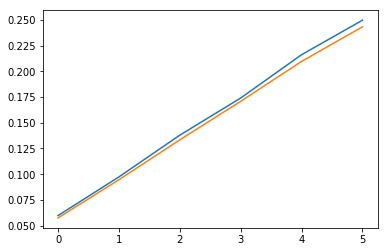

In [121]:
missing_rate_list = []
missing_rate_list_col_Hit = []
for df_complete_sampled in df_complete_sampled_list:

    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled) - df_complete_sampled.count())
    assist = sum(df_complete_sampled.count())

    miss_rate = missing/(missing+assist)
    missing_rate_list.append(miss_rate)
    
    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled[col_Hit]) - df_complete_sampled[col_Hit].count())
    assist = sum(df_complete_sampled[col_Hit].count())

    miss_rate = missing/(missing+assist)
    missing_rate_list_col_Hit.append(miss_rate)


plt.plot(missing_rate_list)
plt.plot(missing_rate_list_col_Hit)

In [134]:
col_Mse = ['id', 'budget', 'original_language', 'popularity', 'release_date',
       'runtime', 
       'production_companies0_mean', 'production_companies0_var',
       'production_countries0_mean', 'production_countries0_var',
       'spoken_languages0_mean', 'spoken_languages0_var', ]
           
col_Hit = ['id', 'genres0_mean', 'genres0_var', 'genres1_mean', 'genres1_var','Keywords0_mean',
       'Keywords0_var', 'Keywords1_mean', 'Keywords1_var', 'Keywords2_mean',
       'Keywords2_var', 'cast0_mean', 'cast0_var', 'cast1_mean', 'cast1_var',
       'cast2_mean', 'cast2_var', 'crew0_mean', 'crew0_var', 'crew1_mean',
       'crew1_var', 'crew2_mean', 'crew2_var']

col_Hit_sub = ['genres0', 'genres1','Keywords0',
        'Keywords1',  'Keywords2',
        'cast0', 'cast1', 
       'cast2',  'crew0', 'crew1',
        'crew2']

dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']

dataList_expendsize = { 'belongs_to_collection':1,  'genres':3, 'production_companies':3, 'production_countries':3,  'spoken_languages':3, 'Keywords':3, 'cast':3, 'crew':3}

orgDF = pd.read_csv('save_ORG.csv')

for col in dataList :
    orgDF[[col]] = orgDF[[col]].applymap(literal_eval)    
    
PerformanceDF = pd.read_csv('Performance.csv')
PerformanceDF["mean"] = PerformanceDF["mean"].astype(float)
PerformanceDF["var"] = round(PerformanceDF["var"],0)

def hitRate(predDF,df_complete_sampled, std_scale_fullset,col_Hit):
    
    winsound.Beep(1800, 1000)
    cols = predDF.columns 
    predDF = pd.DataFrame(std_scale_fullset.inverse_transform(predDF), columns = cols)

    predDF = predDF[col_Hit]
    predDF.rename(columns={"id": "id0"}, inplace=True)
    predDF = round(predDF,0)
    hit = 0
    count = 0
    colist = col_Hit_sub
    Org_IDList = orgDF["id"].tolist()
    print(predDF.head())
    for col in colist:
        for x in range(len(predDF)):
            if np.isnan(df_complete_sampled[col+"_mean"][x]):
                TargetID = PerformanceDF.loc[(PerformanceDF['mean'] < predDF[col+"_mean"][x]+6234511.514) & 
                                             (PerformanceDF['mean'] > predDF[col+"_mean"][x]-6234511.514) &
                                             (PerformanceDF['var'] < predDF[col+"_var"][x]+50791034.15)&
                                             (PerformanceDF['var'] > predDF[col+"_var"][x]-50791034.15)&
                                             (PerformanceDF['col']==col[:-1])]["id"]
                flag = 0
                print("TargetID :  ", TargetID.tolist())
                for id in TargetID:
                    if (predDF["id0"][x] in Org_IDList):
                        cell = orgDF["id"].tolist().index(predDF["id0"][x])
                        if id in orgDF[col[:-1]][cell]:
                            print("HIT!")
                            flag = 1
                hit = hit + flag
                count +=1
    return hit / count

In [135]:
winsound.Beep(1800, 1000)
from fancyimpute import KNN 
from fancyimpute import IterativeImputer 
from fancyimpute import SoftImpute 
from sklearn.impute import SimpleImputer

now = time.time()

rmsDict = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent','constant'],index=missing_rate_list)
rmsAllDict = pd.DataFrame(columns=['KNN','IterativeImputer', 'SoftImpute','mean','median','most_frequent','constant'],index=missing_rate_list)
hitDict = pd.DataFrame(columns=['KNN','IterativeImputer', 'SoftImpute','mean','median','most_frequent','constant'],index=missing_rate_list)


for i , df_complete_sampled in enumerate(df_complete_sampled_list):
    tar_miss_rate = missing_rate_list[i]
    rms_list = []
    rmsAll_list = []
    hit_list = []
    for k in range(5):
        df_predicted = pd.DataFrame(KNN(k,verbose=False).fit_transform(df_complete_sampled))

        df_predicted.columns  = df_complete.columns 

        rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
        rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
        hit = hitRate(df_predicted, df_complete_sampled, std_scale_fullset,col_Hit)
        rms_list.append(rms)
        rmsAll_list.append(rmsAll)
        hit_list.append(hit)

    rmsDict["KNN"][tar_miss_rate] = round(min(rms_list), 5) 
    rmsAllDict["KNN"][tar_miss_rate] = round(min(rmsAll_list), 5) 
    hitDict["KNN"][tar_miss_rate] = round(max(hit_list), 5) 
    
    
    # Prediction with IterativeImputer
    df_predicted = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_complete_sampled))
    df_predicted.columns  = df_complete.columns 
    rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
    rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
    hit = hitRate(df_predicted,df_complete_sampled, std_scale_fullset,col_Hit)

    rmsDict["IterativeImputer"][tar_miss_rate] = round(rms, 5) 
    rmsAllDict["IterativeImputer"][tar_miss_rate] = round(rmsAll, 5)
    hitDict["IterativeImputer"][tar_miss_rate] = round(hit, 5) 

    # Prediction with SoftImpute 

    df_predicted = pd.DataFrame(SoftImpute(verbose=False).fit_transform(df_complete_sampled))
    df_predicted.columns  = df_complete.columns 
    rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
    rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
    hit = hitRate(df_predicted,df_complete_sampled, std_scale_fullset,col_Hit)

    rmsDict["SoftImpute"][tar_miss_rate] = round(rms, 5) 
    rmsAllDict["SoftImpute"][tar_miss_rate] = round(rmsAll, 5) 
    hitDict["SoftImpute"][tar_miss_rate] = round(hit, 5) 

    #Prediction with 'mean','median','most_frequent'

    # https://scikit-learn.org/stable/modules/impute.html#impute
    

    for stra in ['mean','median','most_frequent','constant']:

        imp = SimpleImputer(missing_values=np.nan, strategy=stra, fill_value = 0)
        imp.fit(df_complete_sampled)
        df_predicted = imp.transform(df_complete_sampled)
        df_predicted = pd.DataFrame(df_predicted)
        df_predicted.columns  = df_complete.columns
        rms = np.sqrt(mean_squared_error(df_predicted[col_Mse], df_complete[col_Mse]))
        rmsAll = np.sqrt(mean_squared_error(df_predicted, df_complete))
        hit = hitRate(df_predicted, df_complete_sampled, std_scale_fullset,col_Hit)

        rmsDict[stra][tar_miss_rate] = round(rms, 5) 
        rmsAllDict[stra][tar_miss_rate] = round(rmsAll, 5) 
        hitDict[stra][tar_miss_rate] = round(hit, 5) 
        
    print(rmsDict)
print(time.time() - now)

      id0  genres0_mean   genres0_var  genres1_mean   genres1_var  \
0  3010.0    60875742.0  1.187479e+16   138897794.0  4.389316e+16   
1  3017.0    60875742.0  1.187479e+16   122367176.0  4.789789e+16   
2  3018.0    59633963.0  8.096473e+15    45406073.0  8.771844e+15   
3  3020.0    45406073.0  8.771844e+15    52705007.0  1.091601e+16   
4  3021.0    59491276.0  1.101972e+16    60875742.0  1.187479e+16   

   Keywords0_mean  Keywords0_var  Keywords1_mean  Keywords1_var  \
0      66358090.0   1.757110e+15      69468780.0   3.507640e+15   
1      30972999.0   5.027767e+15      74784974.0   5.490719e+15   
2      80871136.0   4.070695e+15      52403679.0   1.199291e+16   
3      67856264.0   2.950205e+15      52998000.0   3.528442e+15   
4      45459069.0   2.272236e+14      69468780.0   5.550257e+14   

   Keywords2_mean  ...   cast1_mean     cast1_var   cast2_mean     cast2_var  \
0      91576081.0  ...  518469463.0  6.381407e+15   94355645.0  1.145711e+16   
1      98269212.0  ...

In [136]:
hitDict

,KNN,IterativeImputer,SoftImpute,mean,median,most_frequent,constant
0.059782,0.20144,0.24101,0.2464,0.08453,0.15827,0.18525,0.08453
0.097367,0.20316,0.23474,0.18842,0.09579,0.15263,0.13263,0.09263
0.137921,0.17817,0.20861,0.19376,0.0928,0.12769,0.13066,0.09131
0.173990,0.18079,0.18556,0.20585,0.08234,0.11993,0.14499,0.08353
0.216060,0.1568,0.17385,0.16722,0.08669,0.10848,0.11464,0.08479
0.249581,0.14929,0.15517,0.16653,0.082,0.11228,0.13835,0.08032


In [127]:
if (file == "test.csv"):
    rmsDict.to_csv('rmsDict_test.csv',index_label = False)
    rmsAllDict.to_csv('rmsAllDict_test.csv',index_label = False)
    hitDict.to_csv('hitDict_test.csv',index_label = False)
else:
    rmsDict.to_csv('rmsDict.csv',index_label = False)
    rmsAllDict.to_csv('rmsAllDict.csv',index_label = False)
    hitDict.to_csv('hitDict.csv',index_label = False)

In [128]:
if(os.path.isfile('rmsDict.csv')):
    rmsDict = pd.read_csv('rmsDict.csv')
    
if(os.path.isfile('rmsAllDict.csv')):
    rmsAllDict = pd.read_csv('rmsAllDict.csv')
    
if(os.path.isfile('hitDict.csv')):
    hitDict = pd.read_csv('hitDict.csv')

Text(0.5, 0, 'Missing Rate')

<Figure size 432x288 with 0 Axes>

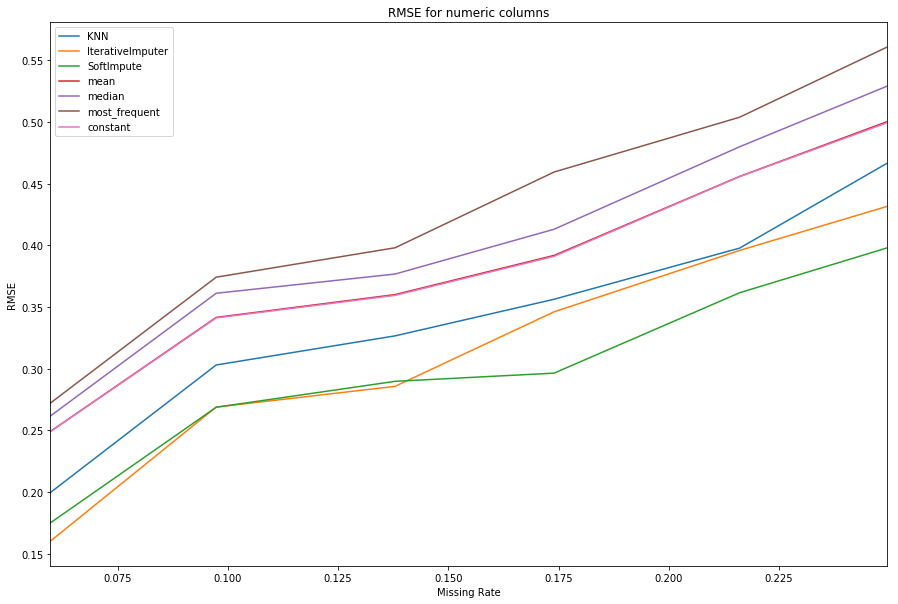

<Figure size 432x288 with 0 Axes>

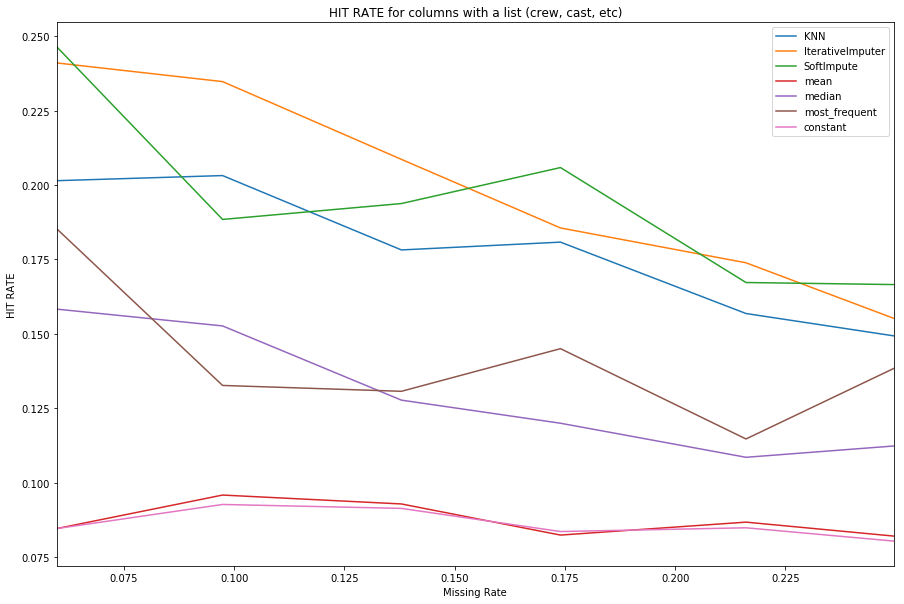

<Figure size 432x288 with 0 Axes>

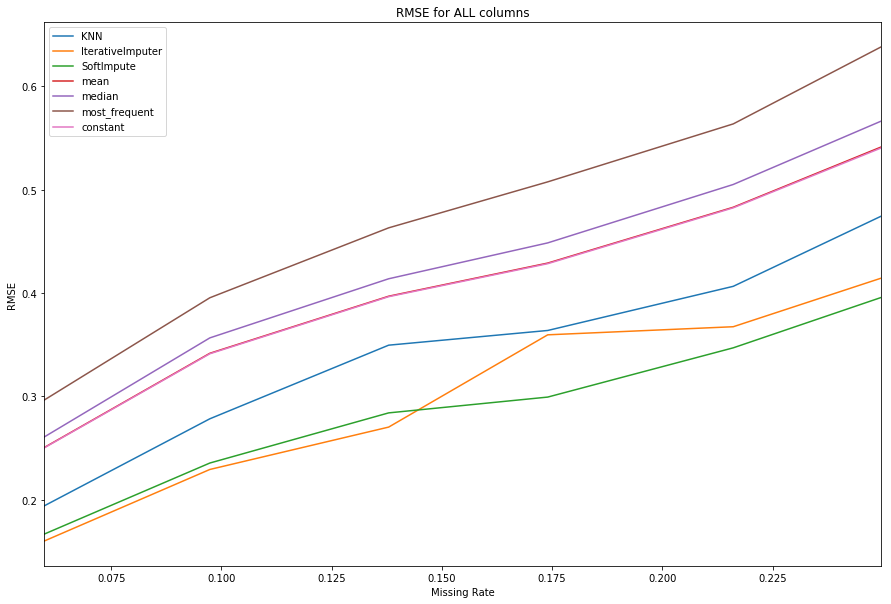

In [138]:
plt.figure()
rmsDict.plot(figsize=(15, 10))
plt.title("RMSE for numeric columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

plt.figure()
hitDict.plot(figsize=(15, 10))
plt.title("HIT RATE for columns with a list (crew, cast, etc)")
plt.ylabel('HIT RATE')
plt.xlabel('Missing Rate')

plt.figure()
rmsAllDict.plot(figsize=(15, 10))
plt.title("RMSE for ALL columns")
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

In [86]:
missing_rate_list

[0.05593435802611811,
 0.09606494857274933,
 0.13639778111637582,
 0.17248353172310182,
 0.20955160060094766,
 0.25245579567779963]

# Normalizing the data and seperating the train and test set

In [96]:
#from https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

from sklearn import preprocessing
#Select numerical columns which needs to be normalized
train_norm = df[df.columns[0:2400]]
test_norm = df[df.columns[2400:3005]]

# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
df.update(training_norm_col)

df.head()

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,NaN,NaN,NaN,NaN,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# save to save.csv

df.to_csv('save_Cleaned.csv',index_label = False)
df = pd.read_csv('save_Cleaned.csv')

# Prediction with the chosen imputetion method

In [98]:
#creating df df_pred to do prediction for those with non-nan values > 2000
predicting_list = []
print("These are the columns that we are not doing prediction to fill the empty cell")
for col in df:
    
    if (df[col].count() > 2000):
        predicting_list.append(col)
    else:
        print(col,df[col].count())
predicting_list.remove("revenue")


df_pred = pd.DataFrame()
df_pred = df[predicting_list].copy()

These are the columns that we are not doing prediction to fill the empty cell
belongs_to_collection0_mean 132
belongs_to_collection0_var 132
genres2_mean 1428
genres2_var 1428
production_companies1_mean 1185
production_companies1_var 1185
production_companies2_mean 557
production_companies2_var 557
production_countries1_mean 716
production_countries1_var 716
production_countries2_mean 186
production_countries2_var 186
spoken_languages1_mean 860
spoken_languages1_var 860
spoken_languages2_mean 317
spoken_languages2_var 317


In [99]:
#cause knn dosent accept a string heading, so changng the heading
df_pred.columns = range(df_pred.shape[1])
df_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,0.305793,0.119747,NaN,NaN,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,-0.394194,-0.234565,-0.667050,-0.565860,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.394194,-0.234565,NaN,NaN,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.394194,-0.234565,-0.212953,-0.399303,...,NaN,NaN,NaN,NaN,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,0.643392,0.308108,1.027674,1.206886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#checking if everything is in float for df
for x in df:
    for y in range(len(df)):
        if not (isinstance(df[x][y], float) or isinstance(df[x][y], int) or math.isnan(float(df[x][y]))):
            print(x,y,df[x][y],type(df[x][y]))

In [101]:
# finally doing the prediction lol ==" i want to cry
from fancyimpute import SoftImpute 

now = time.time()

df_pred = pd.DataFrame(SoftImpute(verbose=False).fit_transform(df_pred))

#adding back the columns for df_pred
df_pred.columns = predicting_list

print(time.time() - now)

#merging df with df_pred
for col in df_pred:
    df[col] = df_pred[col]
    
df.head()

0.4847116470336914


,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,-0.327269,-0.167703,-0.229952,-0.056413,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,0.038904,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,-0.022125,0.009950,0.118457,0.128074,-0.003747,-0.021688,-0.014224,-0.029175,-0.021422,-0.006265


In [102]:
# save to save.csv
df.to_csv('save_Predicted.csv',index_label = False)
df0 = pd.read_csv('save_Cleaned.csv')
df1 = pd.read_csv('save_Predicted.csv')

In [103]:
df0.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,NaN,NaN,NaN,NaN,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,NaN,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0_mean,belongs_to_collection0_var,genres0_mean,...,cast1_mean,cast1_var,cast2_mean,cast2_var,crew0_mean,crew0_var,crew1_mean,crew1_var,crew2_mean,crew2_var
0,-1.731474,-0.419613,-0.317964,-0.155998,1.092601,-0.726722,-0.395691,NaN,NaN,0.305793,...,-0.484960,-0.310352,-0.744661,-0.341772,-0.477656,-0.212346,-0.535937,-0.225419,-0.568454,-0.277494
1,-1.730319,0.226211,-0.317964,-0.017714,0.141105,0.223861,0.206703,NaN,NaN,-0.394194,...,0.846995,-0.248294,-0.176465,-0.258123,-0.228641,-0.107887,-0.177994,-0.154308,0.264279,-0.178211
2,-1.729164,-0.685394,-0.317964,4.613849,1.059732,-0.156372,-0.390038,NaN,NaN,-0.394194,...,-0.582895,-0.290257,-0.330949,-0.265582,-0.562282,-0.209828,-0.338771,-0.206442,-0.434538,-0.262550
3,-1.728009,-0.737557,-0.078653,-0.436981,0.826182,0.651624,-0.368890,NaN,NaN,-0.394194,...,-0.327269,-0.167703,-0.229952,-0.056413,-0.452164,-0.213101,-0.505975,-0.229426,-0.616184,-0.281270
4,-1.726855,0.038904,0.160657,-0.604463,0.547406,0.461507,-0.456710,NaN,NaN,0.643392,...,-0.022125,0.009950,0.118457,0.128074,-0.003747,-0.021688,-0.014224,-0.029175,-0.021422,-0.006265
